# Figure 2: Experiment 1, Neuroimaging Temporal Phase ($\sigma_{\phi}$),
This notebook is used to recreate Figure 2, showing the temporal phase [$\sigma_{\phi}$] results for the neuroimaging data in Experiment 1. The data acquired has the following dimensions:
 1. X = 128
 2. Y = 100
 3. Slices = 6
 4. Diffusion directions [b=0 + $G_x$, $G_y$, $G_z$] = 4
 5. Repetitions = 5
 6. Trigger Delays = 8

A user can selcet the volunteer, slice, and diffusion direction, and trigger-delay to then compute the temporal phase for a given grouping of images (Fig. 2A). The user can also select the slice and diffusion direction to plot the mean temporal phase variation across the 8 different trigger delay times (Fig. 2B). These are the same steps that are used to create Supplementary Figures 1 & 2. 

The last portion of the code shows heatmaps so a user can test signifiance between different different motion compensation levels for different trigger-delay times, motion compensation levels, and slice positioning. 

Contact for questions:\
Ariel Hannum\
ahannum@stanford.edu\
Stanford University

# Figure 2A: $\sigma_{\phi}$ Images for a Given Volunteer, Slice, Diffusion Direction

In [1]:
# Import utilities
from cmcrameri import cm
from helper_phase_utils import *
from matplotlib import pyplot as plt
import math
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.widgets import Slider,RadioButtons,CheckButtons
import numpy as np
import pandas as pd
import tkinter as tk
import seaborn as sns


/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [2]:
# Load data
directory = '/Users/arielhannum/Documents/Stanford/CMR-Setsompop/Projects/Phase/Data/Brain' #'/Volumes/T7/phase_data/Brain'
color = cm.lajolla_r


In [3]:
timepoints = np.arange(8)
volunteers = np.arange(10)
# Set up the initial volunteer
initial_volunteer = 1
volunteer = 1
slice = 0
diffusion = 0

# Load the initial images
initial_image_m0, __, initial_mag_m0, initial_mask_m0  = load_image(0, 0, volunteers[initial_volunteer], diffusion, slice, directory)
initial_image_m1, __, initial_mag_m1, initial_mask_m1  = load_image(1, 0, volunteers[initial_volunteer], diffusion, slice, directory)
initial_image_m2, __, initial_mag_m2, initial_mask_m2  = load_image(2, 0, volunteers[initial_volunteer], diffusion, slice, directory)

0


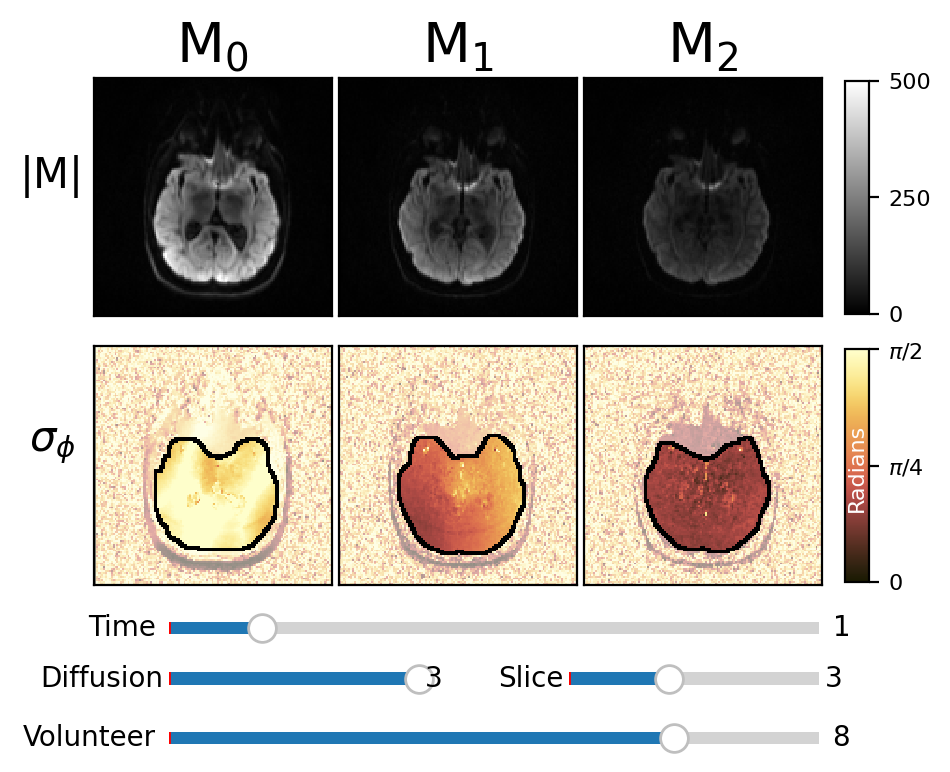

In [4]:
print(diffusion)
# Function to update the heatmap based on the slider value
def update_heatmap(val):
    global timepoint 
    timepoint = int(slider.val)

    # Load images for the timepoint 
    image_m0, __, mag_m0, mask_m0  = load_image(0, timepoint, volunteer, diffusion, slice, directory)
    image_m1, __, mag_m1, mask_m1  = load_image(1, timepoint, volunteer, diffusion, slice, directory)
    image_m2, __, mag_m2, mask_m2  = load_image(2, timepoint, volunteer, diffusion, slice, directory)

    #update the background image
    background[0].set_data(image_m0)
    background[1].set_data(image_m1)
    background[2].set_data(image_m2)

    #update the main image
    images[0].set_data(image_m0*mask_m0)
    images[1].set_data(image_m1*mask_m1)
    images[2].set_data(image_m2*mask_m2)

    #update the tracing 
    masks[0].set_data(get_edge(np.nan_to_num(mask_m0)))
    masks[1].set_data(get_edge(np.nan_to_num(mask_m1)))
    masks[2].set_data(get_edge(np.nan_to_num(mask_m2)))

    # update the magnitude images
    mag[0].set_data(mag_m0)
    mag[1].set_data(mag_m1)
    mag[2].set_data(mag_m2)

    # Redraw the figure
    canvas.draw()

# Function to update figure based on diffusion direction
def change_diffusion(val):
    global diffusion,type
    diffusion = int(slider_diff.val)
    #diffusion = 0 if type == 'b=0' else 1 if type == 'G_x' else 2 if type == 'G_y' else 3
    update_heatmap(slider.val)

# Function to update figure based on slice position
def change_slice(val):
    global slice
    slice = int(slider_slice.val)-1
    update_heatmap(slider.val)


# Function to update figure based on slice position
def change_volunteer(val):
    global volunteer
    volunteer = int(slider_volunteer.val)
    update_heatmap(slider.val)


# Create a Tkinter window
window = tk.Tk()

# Create a figure and axis for the bar and slider
fig, ax = plt.subplots(2, 3, figsize=(5, 7), dpi = 200, sharey=True,sharex = True)
plt.subplots_adjust(bottom=0.25,wspace=0.03, hspace=0.01)

# Create a slider for the timepoints
slider_ax = plt.axes([0.2, 0.2, 0.65, 0.03], facecolor='lightgray')
slider = Slider(slider_ax, 'Time', 0, 7, valinit=0, valstep=1)

# Plot the initial images for the first timepoint
# Initialize the plot elements
images = [None, None, None]
masks = [None, None, None]
background = [None, None, None]
mag = [None, None, None]

background[0] = ax[1,0].imshow(initial_image_m0,vmin = 0,vmax = math.pi/2,cmap =color,alpha = 0.5,interpolation = 'nearest')
background[1] = ax[1,1].imshow(initial_image_m1,vmin = 0,vmax = math.pi/2,cmap =color,alpha = 0.5,interpolation = 'nearest')
background[2] = ax[1,2].imshow(initial_image_m2,vmin = 0,vmax = math.pi/2,cmap =color,alpha = 0.5,interpolation = 'nearest')

images[0] = ax[1,0].imshow(initial_image_m0*initial_mask_m0,vmin = 0,vmax = math.pi/2,cmap =color,interpolation = 'nearest')
images[1] = ax[1,1].imshow(initial_image_m1*initial_mask_m1,vmin = 0,vmax = math.pi/2,cmap =color,interpolation = 'nearest')
images[2] = ax[1,2].imshow(initial_image_m2*initial_mask_m2,vmin = 0,vmax = math.pi/2,cmap =color,interpolation = 'nearest')

masks[0] = ax[1,0].imshow(get_edge(np.nan_to_num(initial_mask_m0)),vmin = 0,vmax = 1,cmap ='gray_r',interpolation = 'nearest')
masks[1] = ax[1,1].imshow(get_edge(np.nan_to_num(initial_mask_m1)),vmin = 0,vmax = 1,cmap ='gray_r',interpolation = 'nearest')
masks[2] = ax[1,2].imshow(get_edge(np.nan_to_num(initial_mask_m2)),vmin = 0,vmax = 1,cmap ='gray_r',interpolation = 'nearest')

mag[0] = ax[0,0].imshow(initial_mag_m0,vmin = 0,vmax = 500,cmap ='gray',interpolation = 'nearest')
mag[1] = ax[0,1].imshow(initial_mag_m1,vmin = 0,vmax = 500,cmap ='gray',interpolation = 'nearest')
mag[2] = ax[0,2].imshow(initial_mag_m2,vmin = 0,vmax = 500,cmap ='gray',interpolation = 'nearest')

# Set titles and labels 
ax[0,0].set_title('M$_0$',size = 20)
ax[0,1].set_title('M$_1$',size = 20)
ax[0,2].set_title('M$_2$',size = 20)

for jj in range(2):
    for ii in range(3):
        ax[jj,ii].get_xaxis().set_ticks([])
        ax[jj,ii].get_yaxis().set_ticks([])

ax[0, 0].set_ylabel('|M|',rotation = 0, labelpad=15,size = 15)
ax[1, 0].set_ylabel('$\sigma_{\phi}$',rotation = 0, labelpad=15,size = 15)

# Create colorbars for each row
cbar1 = fig.colorbar(mag[0], ax=ax[0, :],fraction=0.03, pad=0.03,aspect = 10,ticks = [0,250,500])
cbar2 = fig.colorbar(images[0], ax=ax[1, :],fraction=0.03, pad=0.03,aspect = 10,ticks = [0,math.pi/4,math.pi/2])

label_text = 'Radians'
cbar2.ax.text(0.5, 0.3, label_text, transform=cbar2.ax.transAxes,
    ha='center', va='bottom',rotation=90,color = 'white',size = 8)


cbar1.ax.set_yticklabels([0,250,500],size =8, rotation = 0) 
cbar2.ax.set_yticklabels(['0', '$\pi/4$', '$\pi/2$'],size =8, rotation = 0) 

# Create a slider for the timepoints
slider_ax_diff = plt.axes([0.2, 0.14, 0.25, 0.03], facecolor='lightgray')
slider_diff = Slider(slider_ax_diff, 'Diffusion', 0, 3, valinit=0, valstep=1)

# Create a slider for the slices
slider_ax_slice = plt.axes([0.6, 0.14, 0.25, 0.03], facecolor='lightgray')
slider_slice = Slider(slider_ax_slice, 'Slice', 1, 6, valinit=0, valstep=1)

# Create a slider for the volunteer 
slider_ax_volunteer = plt.axes([0.2, 0.07, 0.65, 0.03], facecolor='lightgray')
slider_volunteer = Slider(slider_ax_volunteer, 'Volunteer', 1, 10, valinit=0, valstep=1)


# Attach the update_heatmap function to the slider's on_changed event
slider.on_changed(update_heatmap)
slider_diff.on_changed(change_diffusion)
slider_slice.on_changed(change_slice)
slider_volunteer.on_changed(change_volunteer)


# Create a Tkinter canvas and add the figure to it
canvas = FigureCanvasTkAgg(fig, master=window)
canvas.draw()
canvas.get_tk_widget().pack()


# Start the Tkinter event loop
window.mainloop()



# Figure 2B: $\sigma_{\phi}$ average for each volunteer plotted as a function of timepoint.
Can vary diffusion direction and slice shown 

In [5]:
# Import utilities
from cmcrameri import cm
from helper_phase_utils import *
from matplotlib import pyplot as plt
import math
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.widgets import Slider,RadioButtons,CheckButtons
import numpy as np
import pandas as pd
import tkinter as tk
import seaborn as sns

In [6]:
# Set background style of plots
sns.set(style='darkgrid', palette='Set2')
# Load data
directory = '/Users/arielhannum/Documents/Stanford/CMR-Setsompop/Projects/Phase/Data/Brain' #'/Volumes/T7/phase_data/Brain'
color = cm.lajolla_r


In [7]:
# List the index of volunteers you want to see plotted 
list_vols = [1,2,3,4,5,7,8,9,10,11]
# Load and Compute the net mean and standard deviation of the temporal phase variation (this can take up to 2 minutes)
m0_mean = get_tempPhs_net_meanstd(directory,list_vols,0)
m1_mean = get_tempPhs_net_meanstd(directory,list_vols,1)
m2_mean = get_tempPhs_net_meanstd(directory,list_vols,2)

Calculating Net Temporal Phase Std. Deviation for Motion 0
Finished volunteer 1/10
Finished volunteer 2/10
Finished volunteer 3/10
Finished volunteer 4/10
Finished volunteer 5/10
Finished volunteer 6/10
Finished volunteer 7/10
Finished volunteer 8/10
Finished volunteer 9/10
Finished volunteer 10/10
Calculating Net Temporal Phase Std. Deviation for Motion 1
Finished volunteer 1/10
Finished volunteer 2/10
Finished volunteer 3/10
Finished volunteer 4/10
Finished volunteer 5/10
Finished volunteer 6/10
Finished volunteer 7/10
Finished volunteer 8/10
Finished volunteer 9/10
Finished volunteer 10/10
Calculating Net Temporal Phase Std. Deviation for Motion 2
Finished volunteer 1/10
Finished volunteer 2/10
Finished volunteer 3/10
Finished volunteer 4/10
Finished volunteer 5/10
Finished volunteer 6/10
Finished volunteer 7/10
Finished volunteer 8/10
Finished volunteer 9/10
Finished volunteer 10/10


In [8]:
mean_combo = np.stack((m0_mean,m1_mean,m2_mean),axis = -1)
mean_all = np.nanmean(mean_combo,axis = -2)
error = np.nanstd(mean_combo,axis = -2)

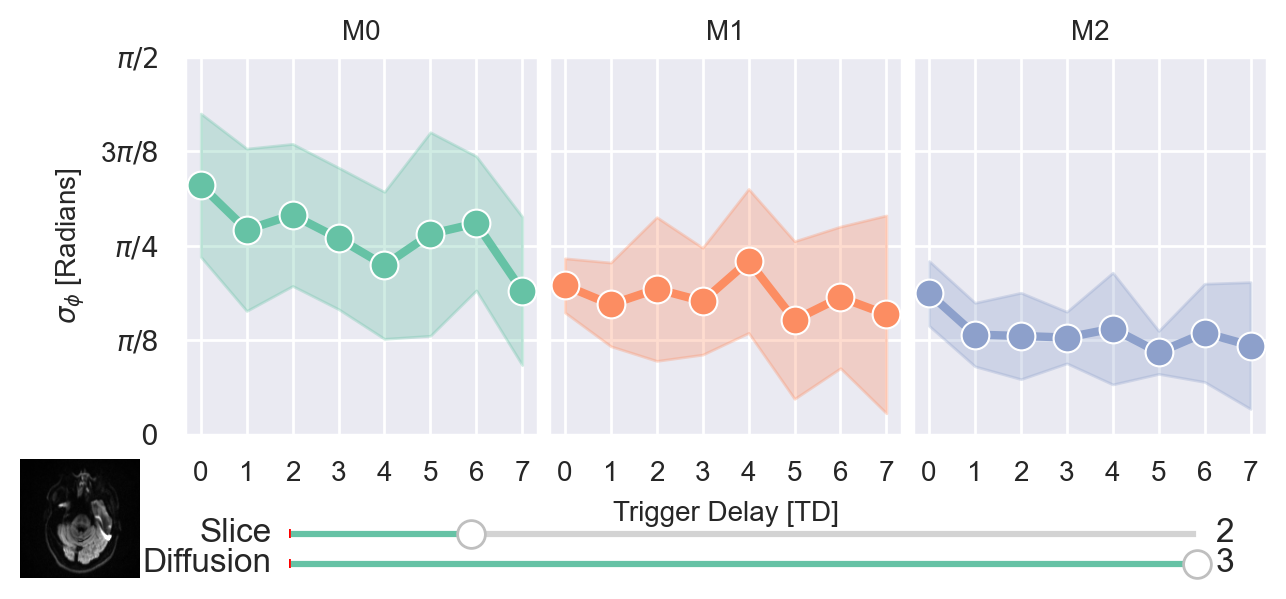

In [9]:
def update_plot(val):
    global slice 
    slice= int(slider.val)-1
    # Update slice index for the lower and upper error bars 
    lower = mean_all[slice,diffusion,:,:] - error[slice,diffusion,:,:]
    upper = mean_all[slice,diffusion,:,:] + error[slice,diffusion,:,:]
    # Update each subplot
    for ii in range(3):
        ax[ii].clear()
        sns.lineplot( data= (mean_all[slice,diffusion,:,ii]),  ax = ax[ii],linewidth =3,marker= 'o',markersize = 10,dashes= False, color = colors[ii],legend = None, )
        ax[ii].set_xticks([0,1,2,3,4,5,6,7])
        ax[ii].set_xticklabels([0,1,2,3,4,5,6,7],size = 10)
        ax[ii].tick_params(axis='y', which='major', labelsize=10)
        ax[ii].set_yticks([0,math.pi/8,math.pi/4,3*math.pi/8,math.pi/2])
        ax[ii].set_yticklabels(['$0$','$\pi/8$','$\pi/4$','3$\pi/8$','$\pi/2$'],size = 10,rotation = 0)
        ax[ii].set_ylim([0,math.pi/2])
        ax[ii].fill_between(np.arange(8),lower[:,ii],upper[:,ii],color = colors[ii],alpha = 0.3)
        ax[ii].set_ylabel('$\sigma_{\phi}$ [Radians]',rotation = 90, labelpad=5,size = 10)
    ax[1].set_xlabel('Trigger Delay [TD]',rotation = 0, labelpad=5,size = 10)
    # Update Image
    # Use an example volunteer as reference image
    image_ax.clear()
    __, __, image, __  = load_image(0, 0, 1, diffusion, slice, directory)
    image_ax.imshow(image,cmap = 'gray',vmin = 0,vmax = 500)
    mag = image_ax.axis("off")

    ax[0].set_title('M0',rotation = 0, size = 10)
    ax[1].set_title('M1',rotation = 0, size = 10)
    ax[2].set_title('M2',rotation = 0, size = 10)


    # Update the plot
    canvas.draw()

# Create a Tkinter window
window = tk.Tk()

# Create a figure and axis for the bar and slider
fig, ax = plt.subplots(1, 3, figsize=(9, 3), dpi = 200, sharey=True,sharex = True)
plt.subplots_adjust(bottom=0.25,wspace=0.03, hspace=0.01)

# Plot the initial images for the first timepoint
# Initialize the plot elements
line = [None, None, None]
fill = [None, None, None]

# Plot the mean and standard deviation of phase
colors = sns.color_palette("colorblind",3)
colors = sns.color_palette("Set2",3)

# Default Plot Create
diffusion = 0
slice = 0
lower = mean_all[slice,diffusion,:,:] - error[slice,diffusion,:,:]
upper = mean_all[slice,diffusion,:,:] + error[slice,diffusion,:,:]
for ii in range(3):
    sns.lineplot( data= (mean_all[slice,diffusion,:,ii]),  ax = ax[ii],linewidth =3,marker= 'o',markersize = 10,dashes= False, color = colors[ii],legend = None, )
    ax[ii].set_xticks([0,1,2,3,4,5,6,7])
    ax[ii].set_xticklabels([0,1,2,3,4,5,6,7],size = 10)
    ax[ii].tick_params(axis='y', which='major', labelsize=10)
    ax[ii].set_yticks([0,math.pi/8,math.pi/4,3*math.pi/8,math.pi/2])
    ax[ii].set_yticklabels(['$0$','$\pi/8$','$\pi/4$','3$\pi/8$','$\pi/2$'],size = 10,rotation = 0)
    ax[ii].set_ylim([0,math.pi/2])
    ax[ii].fill_between(np.arange(8),lower[:,ii],upper[:,ii],color = colors[ii],alpha = 0.3)
    ax[ii].set_ylabel('$\sigma_{\phi}$ [Radians]',rotation = 90, labelpad=5,size = 10)


ax[1].set_xlabel('Trigger Delay [TD]',rotation = 0, labelpad=5,size = 10)
ax[0].set_title('M0',rotation = 0,size = 10)
ax[1].set_title('M1',rotation = 0, size = 10)
ax[2].set_title('M2',rotation = 0, size = 10)

    

# Create a slider for the slices
slider_ax = plt.axes([0.2, 0.07, 0.65, 0.03], facecolor='lightgray')
slider = Slider(slider_ax, 'Slice', 1, 6, valinit=0, valstep=1)

# Function to update figure based on diffusion direction
def change_diffusion(val):
    global diffusion
    diffusion = int(slider_diff.val)
    update_plot(slider.val)

# Create a slider for the slices
slider_ax_diff = plt.axes([0.2, 0.02, 0.65, 0.03], facecolor='lightgray')
slider_diff = Slider(slider_ax_diff, 'Diffusion', 0, 3, valinit=0, valstep=1)


# Attach the update_heatmap function to the slider's on_changed event
slider.on_changed(update_plot)
slider_diff.on_changed(change_diffusion)

# Add an image outside the subplots
image_ax = fig.add_axes([-0.05, 0.01, 0.2, 0.2])  # Adjust the coordinates as needed
# Use an example volunteer as reference image
__, __, image, __  = load_image(0, 0, 1, diffusion, slice, directory)
image_ax.imshow(image,cmap = 'gray',vmin = 0,vmax = 500)
mag = image_ax.axis("off")


# Create a Tkinter canvas and add the figure to it
canvas = FigureCanvasTkAgg(fig, master=window)
canvas.draw()
canvas.get_tk_widget().pack()

# Start the Tkinter event loop
window.mainloop()


# Figure Supplement: Statistical Testing Results for $\sigma_{\phi}$ Represented as heatmaps
Can vary diffusion direction and slice shown 

In [1]:
# Import utilities
from cmcrameri import cm
from helper_phase_utils import *
from matplotlib import pyplot as plt
import math
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.widgets import Slider,RadioButtons,CheckButtons
from matplotlib.colors import BoundaryNorm, ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
import scikit_posthocs as sp
from scipy import stats
import tkinter as tk

/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [2]:
sns.set(style='darkgrid', palette='Set2')
# Load data
directory = '/Users/arielhannum/Documents/Stanford/CMR-Setsompop/Projects/Phase/Data/Brain' #'/Volumes/T7/phase_data/Brain'
color = cm.lajolla_r

# List the index of volunteers you want to see plotted 
list_vols = [1,2,3,4,5,7,8,9,10,11]
# Load and Compute the net mean and standard deviation of the temporal phase variation 
m0_mean = get_tempPhs_net_meanstd(directory,list_vols,0)
m1_mean = get_tempPhs_net_meanstd(directory,list_vols,1)
m2_mean = get_tempPhs_net_meanstd(directory,list_vols,2)

mean_combo = np.stack((m0_mean,m1_mean,m2_mean),axis = -1)

Calculating Net Temporal Phase Std. Deviation for Motion 0
Finished volunteer 1/10
Finished volunteer 2/10
Finished volunteer 3/10
Finished volunteer 4/10
Finished volunteer 5/10
Finished volunteer 6/10
Finished volunteer 7/10
Finished volunteer 8/10
Finished volunteer 9/10
Finished volunteer 10/10
Calculating Net Temporal Phase Std. Deviation for Motion 1
Finished volunteer 1/10
Finished volunteer 2/10
Finished volunteer 3/10
Finished volunteer 4/10
Finished volunteer 5/10
Finished volunteer 6/10
Finished volunteer 7/10
Finished volunteer 8/10
Finished volunteer 9/10
Finished volunteer 10/10
Calculating Net Temporal Phase Std. Deviation for Motion 2
Finished volunteer 1/10
Finished volunteer 2/10
Finished volunteer 3/10
Finished volunteer 4/10
Finished volunteer 5/10
Finished volunteer 6/10
Finished volunteer 7/10
Finished volunteer 8/10
Finished volunteer 9/10
Finished volunteer 10/10


/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/multitest.py:177: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))


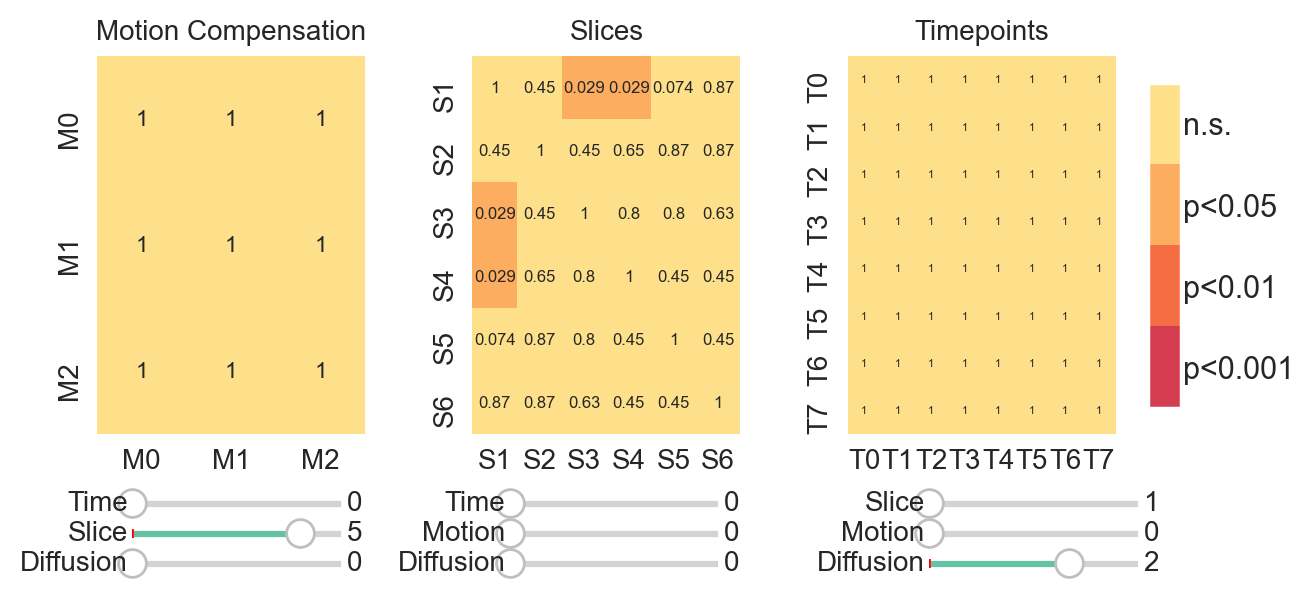

In [8]:
# Create Colormap and Ranges
my_colors = [sns.color_palette("Spectral",9)[0], sns.color_palette("Spectral",9)[1], sns.color_palette("Spectral",9)[2], 
            sns.color_palette("Spectral",9)[3]]
my_cmap = ListedColormap(my_colors)
bounds = [0, 0.001, 0.01, 0.05,1]
my_norm = BoundaryNorm(bounds, ncolors=len(my_colors))

# Create a Tkinter window
window = tk.Tk()

# Create a figure and axis for the bar and slider
fig, ax = plt.subplots(1, 3, figsize=(10, 3), dpi = 200)
plt.subplots_adjust(bottom=0.25,wspace=0.4, hspace=0.01)

# Plot the initial images for the first timepoint
# Initialize the plot elements
line = [None, None, None]
fill = [None, None, None]

# Plot the mean and standard deviation of phase
colors = sns.color_palette("colorblind",3)
colors = sns.color_palette("Set2",3)

# Default Plot Create
diffusion = 0
slice = 0
td=0

hypothesis = compute_statistics_motionComp(mean_combo[slice,diffusion,td,:,:],0.05)
check = np.sum(np.int32(np.isnan(hypothesis)))
if  check==9:
    hypothesis = np.ones((3,3))

plot = sns.heatmap(hypothesis,ax = ax[0], annot = True, xticklabels=['M0','M1','M2'],
        yticklabels=['M0','M1','M2'],norm=my_norm,cmap = my_cmap,cbar = False,annot_kws={"fontsize":8})

ax[0].set_title('Motion Compensation',fontsize = 10)

# Create a slider for the slices
slider_ax = plt.axes([0.15, 0.07, 0.15, 0.03], facecolor='lightgray')
slider = Slider(slider_ax, 'Slice', 1, 6, valinit=0, valstep=1)

slider_ax_diff = plt.axes([0.15, 0.02, 0.15, 0.03], facecolor='lightgray')
slider_diff = Slider(slider_ax_diff, 'Diffusion', 0, 3, valinit=0, valstep=1)

slider_ax_time = plt.axes([0.15, 0.12, 0.15, 0.03], facecolor='lightgray')
slider_time = Slider(slider_ax_time, 'Time', 0, 6, valinit=0, valstep=1)

# Create colorbars for each row
cbar1 = fig.colorbar(plot.collections[0], ax=ax[:], fraction=0.03, pad=0.03, aspect=10)
cbar1.set_ticks([(0 + 0.001) / 2, (0.001 + 0.01) / 2, (0.01 + 0.05) / 2, (0.05 + 1) / 2])
cbar1.set_ticklabels(['p<0.001', 'p<0.01', 'p<0.05', 'n.s.'])

cbar1.ax.xaxis.set_ticks_position('none')  # Remove x-axis ticks
cbar1.ax.yaxis.set_ticks_position('none')  # Remove y-axis ticks
cbar1.ax.tick_params(pad=-5)

# Adjust the tick parameters
for ii in range(3):
    ax[ii].tick_params(axis='x', which='both', bottom=False, top=False, labelsize=10, pad=-1)
    ax[ii].tick_params(axis='y', which='both', left=False, right=False, labelsize=10, pad=-1)

# Function to update figure 1 based on slice location
def change_slice(val):
    global slice
    slice = int(slider.val)-1
    update_heatmap()

# Function to update figure 1 based on diffusion direction
def change_diffusion(val):
    global diffusion
    diffusion = int(slider_diff.val)
    update_heatmap()

# Function to update figure 1 based on timepoint
def change_timepoint(val):
    global td
    td = int(slider_time.val)
    update_heatmap()

# Function to update the first heatmap
def update_heatmap():
    ax[0].clear()
    hypothesis = compute_statistics_motionComp(mean_combo[slice,diffusion,td,:,:],0.05)
    check = np.sum(np.int32(np.isnan(hypothesis)))
    if  check==9:
        hypothesis = np.ones((3,3))
    plot = sns.heatmap(hypothesis,ax = ax[0], annot = True, xticklabels=['M0','M1','M2'],
        yticklabels=['M0','M1','M2'],norm=my_norm,cmap = my_cmap,cbar = False,annot_kws={"fontsize":8})
    ax[0].set_title('Motion Compensation',fontsize = 10)


# Attach the update_heatmap function to the slider's on_changed event for subplot 1
slider.on_changed(change_slice)
slider_diff.on_changed(change_diffusion)
slider_time.on_changed(change_timepoint)

##############################################################################################################
# Function to update the second heatmap
def update_heatmap2():
    ax[1].clear()
    hypothesis = compute_statistics_slices(mean_combo[:,diffusion,td,:,motion],0.05)
    check = np.sum(np.int32(np.isnan(hypothesis)))
    if  check==6**2:
        hypothesis = np.ones((6,6))
    plot = sns.heatmap(hypothesis,ax = ax[1], annot = True, xticklabels=['S1','S2','S3','S4','S5','S6'],
        yticklabels=['S1','S2','S3','S4','S5','S6'],norm=my_norm,cmap = my_cmap,cbar = False,annot_kws={"fontsize":6})
    ax[1].set_title('Slices',fontsize = 10)
    

# Function to update subplot 2 based on variables
def change_val(val):
    global motion,td,diffusion
    motion = int(slider_motion1.val)
    td = int(slider_time2.val)
    diffusion = int(slider_diff2.val)
    update_heatmap2()

# Create Sliders for motion, time and diffusion
slider_ax_motion = plt.axes([0.42, 0.07, 0.15, 0.03], facecolor='lightgray')
slider_motion1 = Slider(slider_ax_motion, 'Motion', 0, 2, valinit=0, valstep=1)

slider_ax_time2 = plt.axes([0.42, 0.12, 0.15, 0.03], facecolor='lightgray')
slider_time2 = Slider(slider_ax_time2, 'Time', 0, 7, valinit=0, valstep=1)

slider_ax_diff = plt.axes([0.42, 0.02, 0.15, 0.03], facecolor='lightgray')
slider_diff2 = Slider(slider_ax_diff, 'Diffusion', 0, 3, valinit=0, valstep=1)

# Update figure when changed 
slider_motion1.on_changed(change_val)
slider_time2.on_changed(change_val)
slider_diff2.on_changed(change_val)

# Initial Heatmap
diffusion = 0
td = 0
motion = 0
ax[1].clear()
hypothesis = compute_statistics_slices(mean_combo[:,diffusion,td,:,motion],0.05)
check = np.sum(np.int32(np.isnan(hypothesis)))
if  check==6**2:
    hypothesis = np.ones((6,6))
plot = sns.heatmap(hypothesis,ax = ax[1], annot = True, xticklabels=['S1','S2','S3','S4','S5','S6'],
    yticklabels=['S1','S2','S3','S4','S5','S6'],norm=my_norm,cmap = my_cmap,cbar = False,annot_kws={"fontsize":6})
ax[1].set_title('Slices',fontsize = 10)

##############################################################################################################
# Third subplot for diffeences in timepoints 

# Function to update the second heatmap
def update_heatmap3():
    ax[2].clear()
    hypothesis = compute_statistics_timepoints(mean_combo[slice,diffusion,:,:,motion],0.05)
    check = np.sum(np.int32(np.isnan(hypothesis)))
    if  check==8**2:
        hypothesis = np.ones((8,8))
    plot = sns.heatmap(hypothesis,ax = ax[2], annot = True, xticklabels=['T0','T1','T2','T3','T4','T5','T6','T7'],
        yticklabels=['T0','T1','T2','T3','T4','T5','T6','T7'],norm=my_norm,cmap = my_cmap,cbar = False,annot_kws={"fontsize":4})
    ax[2].set_title('Timepoints',fontsize = 10)
    

# Function to update subplot 2 based on variables
def change_val3(val):
    global motion,td,diffusion,slice
    motion = int(slider_motion3.val)
    slice = int(slider_slice3.val)-1
    diffusion = int(slider_diff3.val)
    update_heatmap3()

# Create Sliders for motion, time and diffusion
slider_ax_motion3 = plt.axes([0.72, 0.07, 0.15, 0.03], facecolor='lightgray')
slider_motion3 = Slider(slider_ax_motion3, 'Motion', 0, 2, valinit=0, valstep=1)

slider_ax_slice3 = plt.axes([0.72, 0.12, 0.15, 0.03], facecolor='lightgray')
slider_slice3 = Slider(slider_ax_slice3, 'Slice', 1,6, valinit=0, valstep=1)

slider_ax_diff3 = plt.axes([0.72, 0.02, 0.15, 0.03], facecolor='lightgray')
slider_diff3 = Slider(slider_ax_diff3, 'Diffusion', 0, 3, valinit=0, valstep=1)

# Update figure when changed 
slider_motion3.on_changed(change_val3)
slider_slice3.on_changed(change_val3)
slider_diff3.on_changed(change_val3)

# Set default view
slice = 0
diffusion = 0
motion = 0
ax[2].clear()
hypothesis = compute_statistics_timepoints(mean_combo[slice,diffusion,:,:,motion],0.05)
check = np.sum(np.int32(np.isnan(hypothesis)))
if  check==8**2:
    hypothesis = np.ones((8,8))
plot = sns.heatmap(hypothesis,ax = ax[2], annot = True, xticklabels=['T0','T1','T2','T3','T4','T5','T6','T7'],
    yticklabels=['T0','T1','T2','T3','T4','T5','T6','T7'],norm=my_norm,cmap = my_cmap,cbar = False,annot_kws={"fontsize":4})
ax[2].set_title('Timepoints',fontsize = 10)
    
##############################################################################################################
# Create a Tkinter canvas and add the figure to it
canvas = FigureCanvasTkAgg(fig, master=window)
canvas.draw()
canvas.get_tk_widget().pack()

# Start the Tkinter event loop
window.mainloop()